# Capstone Project - The Battle of the Neighborhoods 

**Opening a new Japanese Restaurant in Manhattan and Queens, New York City**

**April 30, 2020, by Tongxi Zhao**

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

New York city is the most populous city in the United States, the core of the New York metropolitan area, and one of the largest cities in the world. It is an international metropolis with great influence on the global economy, commerce, finance, media, politics, education, and entertainment. New York City consists of five boroughs: Manhattan, Queens, Brooklyn, Bronx, and Staten Island, each of which is a county of the state of New York.

New York is also the most densely populated major city in the United States. In 2019, there were 8.419 million people living in the New York city according to United States Census Bureau, Eurostat . 
New York city is the headquarters of the United Nations, so it is also considered the center of world diplomacy. New York city is also known as the “cultural capital of the United States”. People describe the New York City as being diversity, including diverse people coming from the everywhere across the world, diverse languages, diverse food culture etc. According to 2010 Census , the New York City has become the home to more than one million Asian Americans, it contains the highest total Asian population.

In addition, according to the 2000 census, over half of the 37,279 people of Japanese ancestry in the U.S. state of New York lived in New York City. As of 2012, the New York City metropolitan area was home to the largest Japanese community on the East Coast of the United States . After Italian, Chinese and Mexican, Japanese food is probably the most popular ethnic cuisine in the United States. Based on these real facts, to open a new Japanese restaurant is becoming the planned business plan in New York City, and this final project explores the possible neighborhoods to start new Japanese restaurants throughout the Queens and Manhattan, because these two boroughs are having taste food from around the globe, people are more likely to explore delicacy here.

**Business Problem**
I will be leveraging the Foursquare location data to find numbers of popular or people favored Japanese restaurants for each neighborhood in Queens and Manhattan, I will also look at the Japanese restaurants’ frequency in venue category for each neighborhood in Queens and Manhattan. The project assumes that the neighborhood with larger number of favored Japanese restaurants are not optimal choice for opening a new Japanese restaurant become the competition in these neighborhoods could be fierce. The assumption is very naïve without considering other dimensions, such as demographics, geographic preferences, traffic routes, and so on due to the limitation of data availability and time. To improve the results, I will be implementing K-means clusters model to have a cluster on types of venue category with string ‘Restaurant’, the cluster results will indicate the similar neighborhoods and ranking of types of food in these neighborhoods. By combing the numbers of favored Japanese Restaurants and clustered restaurants, I will suggest the possible neighborhoods to open a new Japanese restaurant. 

## Data <a name="data"></a>

* Data Downloaded from: 
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

* Foursquare API

By using this API, I will get all the venues in the Queens and Manhattan’s neighborhood. I can filter these venues to get all type of restaurants.
Given the geographic coordinates of each neighborhoods, the project explores the popular venues in each neighborhood using Foursquares API. The venues information dataset will be leveraged to analyze the business problem. 


In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pylab as pl
from sklearn.cluster import KMeans
import folium 

print("Imported Done")

Imported Done


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
neighborhoods_data = newyork_data['features']

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns = column_names)
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [5]:
# loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index = True)

neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [6]:
print(f"There are {len(neighborhoods['Borough'].unique())} Boroughs in New York City, they are {neighborhoods['Borough'].unique()}")
print(f"There are {neighborhoods.shape[0]} neighborhoods in New York City!")

There are 5 Boroughs in New York City, they are ['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']
There are 306 neighborhoods in New York City!


In [8]:
# Manhattan first
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop = True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [9]:
print(f"There are {len(manhattan_data['Neighborhood'].unique())} Neighborhoods in Manhattan Boroughs")

There are 40 Neighborhoods in Manhattan Boroughs


In [10]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [11]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start = 10)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_manhattan)  
    
map_manhattan

In [84]:
CLIENT_ID = 'GQ1IPYMBJQ1AFNUCRYCFZ3LOQMKOAYU04IMLCYVMZMEIKN1G' # your Foursquare ID
CLIENT_SECRET = 'XEIFPUEPBWGKHHR4NGS1LNNHOZP5LD5DAYLMDZVAQ3NOOS3N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GQ1IPYMBJQ1AFNUCRYCFZ3LOQMKOAYU04IMLCYVMZMEIKN1G
CLIENT_SECRET:XEIFPUEPBWGKHHR4NGS1LNNHOZP5LD5DAYLMDZVAQ3NOOS3N


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                   'Vanue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
manhattan_venues = getNearbyVenues(names = manhattan_data['Neighborhood'],
                                   latitudes = manhattan_data['Latitude'],
                                   longitudes = manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [17]:
print(f"There are {manhattan_venues.shape[0]} top venues within neighborhoods in Manhattan")
manhattan_venues.head()

There are 3225 top venues within neighborhoods in Manhattan


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Marble Hill              40.876551               -73.91066   
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   

                   Vanue ID                             Venue  Venue Latitude  \
0  4baf59e8f964a520a6f93be3                       Bikram Yoga       40.876844   
1  4b4429abf964a52037f225e3                          Arturo's       40.874412   
2  4b79cc46f964a520c5122fe3                     Tibbett Diner       40.880404   
3  4cf6ae55d3a8a1cd71a9d243  Astral Fitness & Wellness Center       40.876705   
4  55f81cd2498ee903149fcc64                         Starbucks       40.877531   

   Venue Longitude Venue Category  
0       -73.906204    Yoga Studio  
1       -73.910271    Pizza Place  
2       -73.908937          Diner  
3       -73.906372            Gym  
4       -73.905582    Coffee Shop

Check how many venues were returned for each neighborhood

In [18]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Vanue ID  \
Neighborhood                                                                   
Battery Park City                       82                      82        82   
Carnegie Hill                           90                      90        90   
Central Harlem                          48                      48        48   
Chelsea                                100                     100       100   
Chinatown                              100                     100       100   
Civic Center                           100                     100       100   
Clinton                                100                     100       100   
East Harlem                             39                      39        39   
East Village                           100                     100       100   
Financial District                     100                     100       100   
Flatiron                               100                     100       100   
Gramercy                                90                      90        90   
Greenwich Village                      100                     100       100   
Hamilton Heights                        62                      62        62   
Hudson Yards                            70                      70        70   
Inwood                                  52                      52        52   
Lenox Hill                             100                     100       100   
Lincoln Square                          94                      94        94   
Little Italy                           100                     100       100   
Lower East Side                         52                      52        52   
Manhattan Valley                        45                      45        45   
Manhattanville                          47                      47        47   
Marble Hill                             23                      23        23   
Midtown                                100                     100       100   
Midtown South                          100                     100       100   
Morningside Heights                     41                      41        41   
Murray Hill                            100                     100       100   
Noho                                   100                     100       100   
Roosevelt Island                        29                      29        29   
Soho                                   100                     100       100   
Stuyvesant Town                         21                      21        21   
Sutton Place                           100                     100       100   
Tribeca                                 84                      84        84   
Tudor City                              79                      79        79   
Turtle Bay                             100                     100       100   
Upper East Side                         97                      97        97   
Upper West Side                         97                      97        97   
Washington Heights                      83                      83        83   
West Village                           100                     100       100   
Yorkville                              100                     100       100   

                     Venue  Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                                 
Battery Park City       82              82               82              82  
Carnegie Hill           90              90               90              90  
Central Harlem          48              48               48              48  
Chelsea                100             100              100             100  
Chinatown              100             100              100             100  
Civic Center           100             100              100             100  
Clinton                100          

Find out how many unique categories can be curated from all the returned venues.

In [19]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 329 uniques categories.


**Analyze each neighborhood**

In [20]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix = "", prefix_sep= "")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  \
0                   0                    0             0   
1                   0                    0             0   
2                   0                    0             0   
3                   0                    0             0   
4                   0                    0             0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                    0          0           0           0       0     0    0   
1                    0          0           0           0       0     0    0   
2                    0          0           0           0       0     0    0   
3                    0          0           0           0       0     0    0   
4                    0          0           0           0       0     0    0   

   Baseball Field  Basketball Court  Beach Bar  Beer Bar  Beer Garden  \
0               0                 0          0         0            0   
1               0                 0          0         0            0   
2               0                 0          0         0            0   
3               0                 0          0         0            0   
4               0                 0          0         0            0   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  \
0           0              0                         0          0           0   
1           0              0                         0          0           0   
2           0              0                         0          0           0   
3           0              0                         0          0           0   
4           0              0                         0          0           0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0       0           0              0          0         0           0   
1       0           0              0          0         0           0   
2       0           0              0          0         0           0   
3       0           0              0          0         0           0   
4       0           0              0          0         0           0   

   Brazilian Restaurant  Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  \
0                     0               0            0       0                0   
1                     0               0            0       0                0   
2                     0               0            0       0                0   
3                     0               0            0       0                0   
4                     0              

In [21]:
manhattan_onehot.shape

(3225, 330)

In [22]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0     Battery Park City           0.000000        0.000000               0.00   
1         Carnegie Hill           0.000000        0.000000               0.00   
2        Central Harlem           0.000000        0.000000               0.00   
3               Chelsea           0.000000        0.000000               0.00   
4             Chinatown           0.000000        0.000000               0.00   
5          Civic Center           0.000000        0.000000               0.00   
6               Clinton           0.000000        0.000000               0.00   
7           East Harlem           0.000000        0.000000               0.00   
8          East Village           0.000000        0.000000               0.00   
9    Financial District           0.000000        0.000000               0.00   
10             Flatiron           0.000000        0.000000               0.00   
11             Gramercy           0.000000        0.000000               0.00   
12    Greenwich Village           0.010000        0.000000               0.00   
13     Hamilton Heights           0.000000        0.016129               0.00   
14         Hudson Yards           0.000000        0.000000               0.00   
15               Inwood           0.000000        0.000000               0.00   
16           Lenox Hill           0.000000        0.000000               0.01   
17       Lincoln Square           0.000000        0.000000               0.00   
18         Little Italy           0.000000        0.000000               0.00   
19      Lower East Side           0.000000        0.000000               0.00   
20     Manhattan Valley           0.000000        0.000000               0.00   
21       Manhattanville           0.000000        0.000000               0.00   
22          Marble Hill           0.000000        0.000000               0.00   
23              Midtown           0.000000        0.000000               0.00   
24        Midtown South           0.000000        0.000000               0.00   
25  Morningside Heights           0.000000        0.000000               0.00   
26          Murray Hill           0.000000        0.000000               0.00   
27                 Noho           0.000000        0.000000               0.00   
28     Roosevelt Island           0.000000        0.000000               0.00   
29                 Soho           0.000000        0.000000               0.00   
30      Stuyvesant Town           0.000000        0.000000               0.00   
31         Sutton Place           0.000000        0.010000               0.00   
32              Tribeca           0.000000        0.000000               0.00   
33           Tudor City           0.000000        0.000000               0.00   
34           Turtle Bay           0.000000        0.000000               0.00   
35      Upper East Side           0.000000        0.000000               0.00   
36      Upper West Side           0.010309        0.000000               0.00   
37   Washington Heights           0.012048        0.000000               0.00   
38         West Village           0.010000        0.010000               0.00   
39            Yorkville           0.000000        0.000000               0.00   

    African Restaurant  American Restaurant  Antique Shop  \
0             0.000000             0.012195          0.00   
1             0.000000             0.011111          0.00   
2             0.041667             0.041667          0.00   
3             0.000000             0.040000          0.00   
4             0.000000             0.040000          0.00   
5             0.000000             0.030000          0.01   
6             0.000000             0.050000          0.00   
7             0.000000             0.000000          0.00   
8             0.000000             0.010000          0.00   
9             0.000000             0.020000          0.00   
10            0.00

In [23]:
manhattan_grouped.shape

(40, 330)

In [24]:
manhattan_japanese_restaurant = manhattan_grouped[['Neighborhood','Japanese Restaurant']]
sort_data = manhattan_japanese_restaurant.sort_values(by = ['Japanese Restaurant'], ascending = False)

In [25]:
manhattan_japanese_restaurant_top15 = sort_data[:15]
manhattan_japanese_restaurant_top15.set_index('Neighborhood', inplace = True)
manhattan_japanese_restaurant_top15

Japanese Restaurant
Neighborhood                          
Murray Hill                   0.050000
Turtle Bay                    0.040000
Flatiron                      0.040000
Roosevelt Island              0.034483
Yorkville                     0.030000
Midtown South                 0.030000
Noho                          0.020000
East Village                  0.020000
Midtown                       0.020000
Little Italy                  0.020000
Lower East Side               0.019231
Hamilton Heights              0.016129
Tudor City                    0.012658
Battery Park City             0.012195
Carnegie Hill                 0.011111

In [27]:
sort_data.tail(15)

Neighborhood  Japanese Restaurant
32              Tribeca                  0.0
31         Sutton Place                  0.0
30      Stuyvesant Town                  0.0
5          Civic Center                  0.0
4             Chinatown                  0.0
15               Inwood                  0.0
6               Clinton                  0.0
25  Morningside Heights                  0.0
7           East Harlem                  0.0
22          Marble Hill                  0.0
21       Manhattanville                  0.0
11             Gramercy                  0.0
12    Greenwich Village                  0.0
17       Lincoln Square                  0.0
20     Manhattan Valley                  0.0

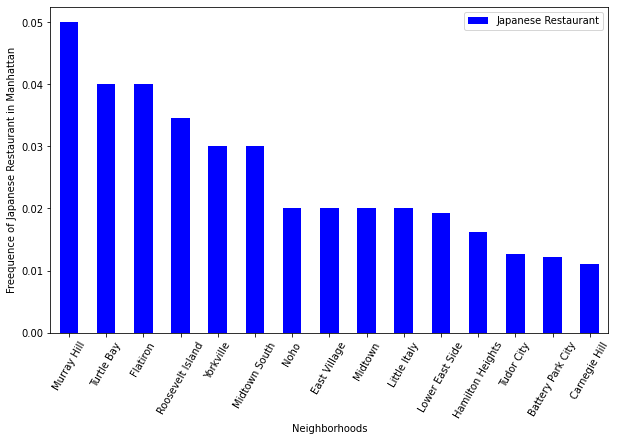

In [28]:
manhattan_japanese_restaurant_top15.plot(kind = 'bar', figsize = (10, 6), color = 'blue')
plt.xlabel('Neighborhoods') 
plt.ylabel('Freequence of Japanese Restaurant in Manhattan') 
pl.xticks(rotation = 60)
plt.show()

In [217]:
def get_venue_info(venue_id):
    venues_info_list = []
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    results = requests.get(url).json()['response']['venue']
    
    venues_info_list.append([results['id'],
                             results['name'],
                             results['rating']])
    #venue_info = pd.DataFrame([item for venue_info_list in venues_info_list for item in venue_info_list])
    column_names = ['ID','Venue','Rating']
    venue_info = pd.DataFrame(venues_info_list, columns = column_names)
    return(venue_info)

In [29]:
manhattan_japanese_data = manhattan_venues.loc[manhattan_venues['Venue Category'] == 'Japanese Restaurant']

manhattan_japanese_data.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
270   Hamilton Heights              40.823604              -73.949688   
470    Upper East Side              40.775639              -73.960508   
599          Yorkville              40.775930              -73.947118   
613          Yorkville              40.775930              -73.947118   
614          Yorkville              40.775930              -73.947118   
688         Lenox Hill              40.768113              -73.958860   
764   Roosevelt Island              40.762160              -73.949168   
862    Upper West Side              40.787658              -73.977059   
1131           Midtown              40.754691              -73.981669   
1152           Midtown              40.754691              -73.981669   

                      Vanue ID                    Venue  Venue Latitude  \
270   531a0207498e06b4656eb8c5  Geisha Japanese Cuisine       40.824355   
470   542efa85498ea11026c9746c               Kappo Masa       40.774527   
599   4bc11982b492d13ad88fa560              Inase Sushi       40.774607   
613   4b3fdfc8f964a5200ab125e3                   Ichiro       40.778901   
614   4bd0fe22a8b3a593a123655f       Donguri Restaurant       40.775678   
688   5aa1d85d5f68b931b6f5acda            Kome Waza UES       40.765602   
764   4a6e0664f964a520acd31fe3                Fuji East       40.758966   
862   5759f71d498e0776955f4096                     Mido       40.789981   
1131  48c50c4bf964a520dc511fe3               Café Zaiya       40.752295   
1152  51fd77be498e883bf20fcca8      OOTOYA 大戸屋 (OOTOYA)       40.754973   

      Venue Longitude       Venue Category  
270        -73.951993  Japanese Restaurant  
470        -73.963466  Japanese Restaurant  
599        -73.950992  Japanese Restaurant  
613        -73.950843  Japanese Restaurant  
614        -73.952478  Japanese Restaurant  
688        -73.957403  Japanese Restaurant  
764        -73.952441  Japanese Restaurant  
862        -73.973311  Japanese Restaurant  
1131       -73.980433  Japanese Restaurant  
1152       -73.986103  Japanese Restaurant

In [30]:
manhattan_japanese_data.shape

(39, 8)

In [31]:
numRest_in_each_Neigh = manhattan_japanese_data.groupby(['Neighborhood']).count()
numRest_in_each_Neigh = numRest_in_each_Neigh.drop(['Neighborhood Latitude','Neighborhood Longitude','Vanue ID','Venue',
                                                   'Venue Latitude', 'Venue Longitude' 
                                                   ], axis = 1)

In [32]:
numRest_in_each_Neigh = numRest_in_each_Neigh.rename(columns = {'Venue Category' : 'Number of Japanese Restaurants'})
numRest_in_each_Neigh

Number of Japanese Restaurants
Neighborhood                                      
Battery Park City                                1
Carnegie Hill                                    1
Chelsea                                          1
East Village                                     2
Financial District                               1
Flatiron                                         4
Hamilton Heights                                 1
Lenox Hill                                       1
Little Italy                                     2
Lower East Side                                  1
Midtown                                          2
Midtown South                                    3
Murray Hill                                      5
Noho                                             2
Roosevelt Island                                 1
Soho                                             1
Tudor City                                       1
Turtle Bay                                       4
Upper East Side                                  1
Upper West Side                                  1
Yorkville                                        3

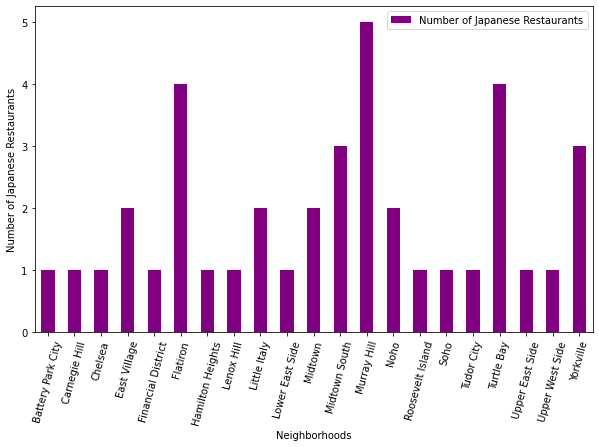

In [33]:
numRest_in_each_Neigh.plot(kind = 'bar', figsize = (10, 6), color = 'purple')
plt.xlabel('Neighborhoods') 
plt.ylabel('Number of Japanese Restaurants') 
pl.xticks(rotation = 75)
plt.show()

We've already looked at the distribution of Japanese Restaurant in Manhattan, let's look at next Borough, which is Queens.

In [34]:
# Queen Borough
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop = True)
Queens_data.head()

Borough     Neighborhood   Latitude  Longitude
0  Queens          Astoria  40.768509 -73.915654
1  Queens         Woodside  40.746349 -73.901842
2  Queens  Jackson Heights  40.751981 -73.882821
3  Queens         Elmhurst  40.744049 -73.881656
4  Queens     Howard Beach  40.654225 -73.838138

In [35]:
print(f"There are {len(Queens_data['Neighborhood'].unique())} Neighborhoods in Queens Borough")

There are 81 Neighborhoods in Queens Borough


In [36]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [37]:
# create map of Queen using latitude and longitude values
map_queens = folium.Map(location = [latitude, longitude], zoom_start = 10)

# add markers to map
for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_queens)  
    
map_queens

In [38]:
queens_venues = getNearbyVenues(names = Queens_data['Neighborhood'],
                                   latitudes = Queens_data['Latitude'],
                                   longitudes = Queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [40]:
print(f"There are {queens_venues.shape[0]} top venues within neighborhoods in Queens.")
queens_venues.head()

There are 2103 top venues within neighborhoods in Queens.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Astoria              40.768509              -73.915654   
1      Astoria              40.768509              -73.915654   
2      Astoria              40.768509              -73.915654   
3      Astoria              40.768509              -73.915654   
4      Astoria              40.768509              -73.915654   

                   Vanue ID             Venue  Venue Latitude  \
0  4bdf502a89ca76b062b75d5e      Favela Grill       40.767348   
1  52c580e8498eddd52d925dd9    Orange Blossom       40.769856   
2  514f9fd5e4b023ae1edd4a68      Off The Hook       40.767200   
3  4a9c0105f964a520b03520e3  Titan Foods Inc.       40.769198   
4  4c94d26d58d4b60c40fc2b29   CrossFit Queens       40.769404   

   Venue Longitude        Venue Category  
0       -73.917897  Brazilian Restaurant  
1       -73.917012          Gourmet Shop  
2       -73.918104    Seafood Restaurant  
3       -73.919253          Gourmet Shop  
4       -73.918977                   Gym

In [41]:
queens_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Vanue ID  \
Neighborhood                                                                    
Arverne                                  20                      20        20   
Astoria                                 100                     100       100   
Astoria Heights                          12                      12        12   
Auburndale                               19                      19        19   
Bay Terrace                              36                      36        36   
Bayside                                  73                      73        73   
Bayswater                                 3                       3         3   
Beechhurst                               14                      14        14   
Bellaire                                 12                      12        12   
Belle Harbor                             18                      18        18   
Bellerose                                17                      17        17   
Blissville                               21                      21        21   
Breezy Point                              6                       6         6   
Briarwood                                10                      10        10   
Broad Channel                             5                       5         5   
Brookville                                1                       1         1   
Cambria Heights                          14                      14        14   
College Point                            44                      44        44   
Corona                                   19                      19        19   
Douglaston                               23                      23        23   
East Elmhurst                            11                      11        11   
Edgemere                                 15                      15        15   
Elmhurst                                 33                      33        33   
Far Rockaway                             30                      30        30   
Floral Park                               8                       8         8   
Flushing                                 61                      61        61   
Forest Hills                             40                      40        40   
Forest Hills Gardens                     20                      20        20   
Fresh Meadows                            15                      15        15   
Glen Oaks                                18                      18        18   
Glendale                                  6                       6         6   
Hammels                                  18                      18        18   
Hillcrest                                16                      16        16   
Hollis                                   13                      13        13   
Holliswood                                6                       6         6   
Howard Beach                             35                      35        35   
Hunters Point                            66                      66        66   
Jackson Heights                          80                      80        80   
Jamaica Center                           45                      45        45   
Jamaica Estates                           2                       2         2   
Jamaica Hills                            25                      25        25   
Kew Gardens                              49                      49        49   
Kew Gardens Hills                        17                      17        17   
Laurelton                                 8                       8         8   
Lefrak City                              20                      20        20   
Lindenwood                               11                      11        11   
Little Neck                              54                      54        54   
Long Island City                         78          

In [42]:
print('There are {} uniques categories.'.format(len(queens_venues['Venue Category'].unique())))

There are 275 uniques categories.


In [43]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix = "", prefix_sep= "")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column use pop and insert 
pop_series = queens_onehot.pop('Neighborhood')
queens_onehot.insert(0, 'Neighborhood', pop_series)
queens_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  American Restaurant  \
0      Astoria                  0                  0                    0   
1      Astoria                  0                  0                    0   
2      Astoria                  0                  0                    0   
3      Astoria                  0                  0                    0   
4      Astoria                  0                  0                    0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  \
0                   0                0          0           0       0     0   
1                   0                0          0           0       0     0   
2                   0                0          0           0       0     0   
3                   0                0          0           0       0     0   
4                   0                0          0           0       0     0   

   Bar  Baseball Field  Basketball Court  Bath House  Beach  Beach Bar  \
0    0               0                 0           0      0          0   
1    0               0                 0           0      0          0   
2    0               0                 0           0      0          0   
3    0               0                 0           0      0          0   
4    0               0                 0           0      0          0   

   Beer Garden  Bike Trail  Bistro  Board Shop  Bookstore  Boutique  \
0            0           0       0           0          0         0   
1            0           0       0           0          0         0   
2            0           0       0           0          0         0   
3            0           0       0           0          0         0   
4            0           0       0           0          0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     1               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3              0           0                     0               0        0   
4              0           0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0            0                0       0         0             0   
1            0                0       0         0             0   
2            0                0       0         0             0   
3            0                0       0         0             0   
4            0                0       0         0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Business Service  Butcher  \
0              0         0            0         0                 0        0   
1              0         0            0         0                 0        0   
2              0         0            0         0                 0        0   
3              0         0            0         0                 0        0   
4              0         0            0         0                 0        0   

   

In [44]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped

Neighborhood  Accessories Store  Afghan Restaurant  \
0                Arverne           0.000000           0.000000   
1                Astoria           0.000000           0.000000   
2        Astoria Heights           0.000000           0.000000   
3             Auburndale           0.000000           0.000000   
4            Bay Terrace           0.027778           0.000000   
5                Bayside           0.000000           0.000000   
6              Bayswater           0.000000           0.000000   
7             Beechhurst           0.000000           0.000000   
8               Bellaire           0.000000           0.000000   
9           Belle Harbor           0.000000           0.000000   
10             Bellerose           0.000000           0.000000   
11            Blissville           0.000000           0.000000   
12          Breezy Point           0.000000           0.000000   
13             Briarwood           0.000000           0.000000   
14         Broad Channel           0.000000           0.000000   
15            Brookville           0.000000           0.000000   
16       Cambria Heights           0.000000           0.000000   
17         College Point           0.000000           0.000000   
18                Corona           0.000000           0.000000   
19            Douglaston           0.000000           0.000000   
20         East Elmhurst           0.000000           0.000000   
21              Edgemere           0.000000           0.000000   
22              Elmhurst           0.000000           0.000000   
23          Far Rockaway           0.000000           0.000000   
24           Floral Park           0.000000           0.000000   
25              Flushing           0.000000           0.000000   
26          Forest Hills           0.000000           0.000000   
27  Forest Hills Gardens           0.000000           0.000000   
28         Fresh Meadows           0.000000           0.000000   
29             Glen Oaks           0.000000           0.000000   
30              Glendale           0.000000           0.000000   
31               Hammels           0.000000           0.000000   
32             Hillcrest           0.000000           0.000000   
33                Hollis           0.000000           0.000000   
34            Holliswood           0.000000           0.000000   
35          Howard Beach           0.000000           0.000000   
36         Hunters Point           0.000000           0.000000   
37       Jackson Heights           0.000000           0.000000   
38        Jamaica Center           0.000000           0.000000   
39       Jamaica Estates           0.000000           0.000000   
40         Jamaica Hills           0.000000           0.000000   
41           Kew Gardens           0.000000           0.000000   
42     Kew Gardens Hills           0.000000           0.000000   
43             Laurelton           0.000000           0.000000   
44           Lefrak City           0.000000           0.000000   
45            Lindenwood           0.000000           0.000000   
46           Little Neck           0.000000           0.000000   
47      Long Island City           0.000000           0.000000   
48                 Malba           0.000000           0.000000   
49               Maspeth           0.000000           0.000000   
50        Middle Village           0.000000           0.000000   
51           Murray Hill           0.000000           0.000000   
52              Neponsit           0.000000           0.000000   
53          North Corona           0.000000           0.000000   
54       Oakland Gardens           0.000000           0.000000   
55            Ozone Park           0.000000           0.000000   
56               Pomonok           0.000000           0.000000   
57        Queens Village           0.000000           0.000000   
58       Queensboro Hill           0.000000           0.000000   
59          Queensbridge           0.000000         

In [37]:
queens_grouped.shape

(81, 276)

In [45]:
queens_japanese_restaurant = queens_grouped[['Neighborhood','Japanese Restaurant']]
sort_data_queens = queens_japanese_restaurant.sort_values(by = ['Japanese Restaurant'], ascending = False)

In [47]:
sort_data_queens.tail(15)

Neighborhood  Japanese Restaurant
37       Jackson Heights                  0.0
34            Holliswood                  0.0
33                Hollis                  0.0
32             Hillcrest                  0.0
31               Hammels                  0.0
30              Glendale                  0.0
29             Glen Oaks                  0.0
28         Fresh Meadows                  0.0
27  Forest Hills Gardens                  0.0
26          Forest Hills                  0.0
25              Flushing                  0.0
24           Floral Park                  0.0
23          Far Rockaway                  0.0
22              Elmhurst                  0.0
40         Jamaica Hills                  0.0

In [46]:
queens_japanese_restaurant_top15 = sort_data_queens[:15]
queens_japanese_restaurant_top15.set_index('Neighborhood', inplace = True)
queens_japanese_restaurant_top15

Japanese Restaurant
Neighborhood                          
Pomonok                       0.100000
Lindenwood                    0.090909
Hunters Point                 0.045455
Steinway                      0.043478
Ravenswood                    0.040000
Maspeth                       0.029412
Howard Beach                  0.028571
Jamaica Center                0.022222
Rego Park                     0.021739
Murray Hill                   0.021277
Astoria                       0.020000
Sunnyside Gardens             0.020000
Little Neck                   0.018519
Woodside                      0.012821
Rosedale                      0.000000

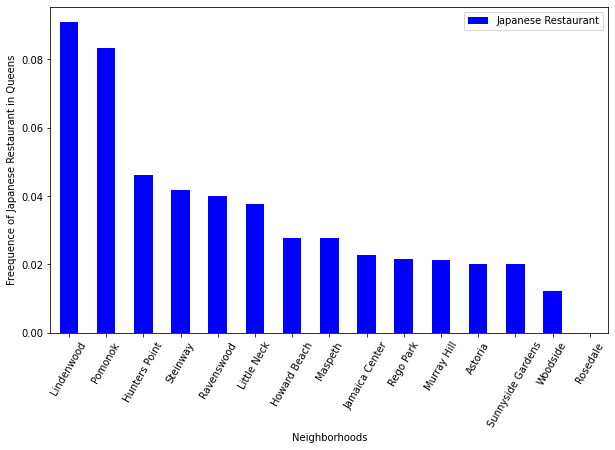

In [40]:
queens_japanese_restaurant_top15.plot(kind = 'bar', figsize = (10, 6), color = 'blue')
plt.xlabel('Neighborhoods') 
plt.ylabel('Freequence of Japanese Restaurant in Queens') 
pl.xticks(rotation = 60)
plt.show()

In [48]:
queens_japanese_data = queens_venues.loc[queens_venues['Venue Category'] == 'Japanese Restaurant']

queens_japanese_data.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
29           Astoria              40.768509              -73.915654   
79           Astoria              40.768509              -73.915654   
121         Woodside              40.746349              -73.901842   
308     Howard Beach              40.654225              -73.838138   
664          Maspeth              40.725427              -73.896217   
733        Rego Park              40.728974              -73.857827   
988      Little Neck              40.770826              -73.738898   
1149  Jamaica Center              40.704657              -73.796902   
1377        Steinway              40.775923              -73.902290   
1529     Murray Hill              40.764126              -73.812763   

                      Vanue ID                          Venue  Venue Latitude  \
29    5c8c36363af988002c811da1               Mochiron Izakaya       40.765406   
79    52e70541498e25eacfde6b47                      Pink Nori       40.764932   
121   59cfbbaf491be76b026b6a84                        Matsuri       40.745626   
308   4c100cd3b93cc9b6482156e0                         Hagane       40.655786   
664   4c4653d8dd35be9ab0a4ddd8                      Wakamatsu       40.727544   
733   4ee7eaf7469064168cac36bf                      Bamboo Ya       40.729812   
988   53696c9b498ef94c9f2bc134                     Tei Nei Ya       40.769336   
1149  50f5979fe4b0ff6d3603e506  PP Boy Japan Teriyaki & Sushi       40.704896   
1377  4c254fd6136d20a1496de361                   Oishii Sushi       40.773779   
1529  4bc8eee83740b713fcbe5d65                 Northern Sushi       40.764717   

      Venue Longitude       Venue Category  
29         -73.918506  Japanese Restaurant  
79         -73.917221  Japanese Restaurant  
121        -73.903387  Japanese Restaurant  
308        -73.839108  Japanese Restaurant  
664        -73.892359  Japanese Restaurant  
733        -73.860812  Japanese Restaurant  
988        -73.736621  Japanese Restaurant  
1149       -73.799031  Japanese Restaurant  
1377       -73.907389  Japanese Restaurant  
1529       -73.811235  Japanese Restaurant

In [49]:
queens_japanese_data.shape

(18, 8)

In [50]:
numRest_in_each_Neigh = queens_japanese_data.groupby(['Neighborhood']).count()
numRest_in_each_Neigh = numRest_in_each_Neigh.drop(['Neighborhood Latitude','Neighborhood Longitude','Vanue ID','Venue',
                                                   'Venue Latitude', 'Venue Longitude' 
                                                   ], axis = 1)

In [51]:
numRest_in_each_Neigh = numRest_in_each_Neigh.rename(columns = {'Venue Category' : 'Number of Japanese Restaurants'})
numRest_in_each_Neigh

Number of Japanese Restaurants
Neighborhood                                     
Astoria                                         2
Howard Beach                                    1
Hunters Point                                   3
Jamaica Center                                  1
Lindenwood                                      1
Little Neck                                     1
Maspeth                                         1
Murray Hill                                     1
Pomonok                                         1
Ravenswood                                      1
Rego Park                                       1
Steinway                                        1
Sunnyside Gardens                               2
Woodside                                        1

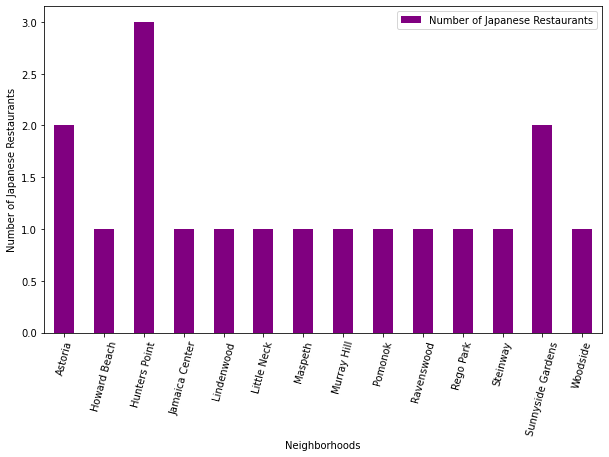

In [52]:
numRest_in_each_Neigh.plot(kind = 'bar', figsize = (10, 6), color = 'purple')
plt.xlabel('Neighborhoods') 
plt.ylabel('Number of Japanese Restaurants') 
pl.xticks(rotation = 75)
plt.show()

In [53]:
address = 'New York'

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [54]:
# create map of  NYC using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start = 10)

# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_nyc)  
    
map_nyc

In [55]:
nyc_venues = getNearbyVenues(names = neighborhoods['Neighborhood'],
                                   latitudes = neighborhoods['Latitude'],
                                   longitudes = neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [56]:
print(nyc_venues.shape)
nyc_venues.head()

(10076, 8)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                   Vanue ID             Venue  Venue Latitude  \
0  4c537892fd2ea593cb077a28  Lollipops Gelato       40.894123   
1  5d5f5044d0ae1c0008f043c3         Walgreens       40.896528   
2  4c783cef3badb1f7e4244b54  Carvel Ice Cream       40.890487   
3  4d6af9426107f04dedeb297a          Rite Aid       40.896649   
4  4c25c212f1272d7f836385c5           Dunkin'       40.890459   

   Venue Longitude  Venue Category  
0       -73.845892    Dessert Shop  
1       -73.844700        Pharmacy  
2       -73.848568  Ice Cream Shop  
3       -73.844846        Pharmacy  
4       -73.849089      Donut Shop

Now, I need to check how many venues were returned for each neighborhood. 

In [57]:
nyc_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      28                      28   
Annadale                                      14                      14   
Arden Heights                                  7                       7   
Arlington                                      5                       5   
Arrochar                                      23                      23   
Arverne                                       20                      20   
Astoria                                      100                     100   
Astoria Heights                               12                      12   
Auburndale                                    19                      19   
Bath Beach                                    51                      51   
Battery Park City                             82                      82   
Bay Ridge                                     84                      84   
Bay Terrace                                   48                      48   
Baychester                                    22                      22   
Bayside                                       73                      73   
Bayswater                                      3                       3   
Bedford Park                                  37                      37   
Bedford Stuyvesant                            30                      30   
Beechhurst                                    14                      14   
Bellaire                                      12                      12   
Belle Harbor                                  18                      18   
Bellerose                                     17                      17   
Belmont                                      100                     100   
Bensonhurst                                   30                      30   
Bergen Beach                                   7                       7   
Blissville                                    21                      21   
Bloomfield                                     4                       4   
Boerum Hill                                   91                      91   
Borough Park                                  21                      21   
Breezy Point                                   6                       6   
Briarwood                                     10                      10   
Brighton Beach                                43                      43   
Broad Channel                                  5                       5   
Broadway Junction                             20                      20   
Bronxdale                                     13                      13   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   18                      18   
Bulls Head                                    49                      49   
Bushwick                                      66                      66   
Butler Manor                                   6                       6   
Cambria Heights                               14                      14   
Canarsie                                       6                       6   
Carnegie Hill                                 90                      90   
Carroll Gardens                              100                     100   
Castle Hill                                    7                       7   
Castleton Corners                             17                      17   
Central Harlem                                48                      48   
Charleston                                    25                      25   
Chelsea                                      106                     106   
Chinatown                                    100                     100   

I need to  find out how many unique categories can be curated from all the returned venues.

In [58]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 437 uniques categories.


**Analyze Each Neighborhood**

In [59]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
# move neighborhood column to the first column use pop and insert 
pop_series1 = nyc_onehot.pop('Neighborhood')
nyc_onehot.insert(0, 'Neighborhood', pop_series1)
nyc_onehot.head()


Neighborhood  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    Wakefield    0                  0               0                  0   
1    Wakefield    0                  0               0                  0   
2    Wakefield    0                  0               0                  0   
3    Wakefield    0                  0               0                  0   
4    Wakefield    0                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Locker  Bakery  \
0                0          0           0           0               0       0   
1                0          0           0           0               0       0   
2                0          0           0           0               0       0   
3                0          0           0           0               0       0   
4                0          0           0           0               0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0      0          0         0            0           0              0   
1      0          0         0            0           0              0   
2      0          0         0            0           0              0   
3      0          0         0            0           0              0   
4      0          0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                         0          0           0       0           0   
1                         0          0           0       0           0   
2                         0          0           0       0           0   
3                         0          0           0       0           0   
4                         0         

Let me examine the new dataframe size.

In [60]:
nyc_onehot.shape

(10076, 437)

In [61]:
# Find out the column names HAVING string restaurant, all type of restaurant. 
rest_list = []

for column in nyc_onehot.columns:
    if 'Restaurant' in column:
        rest_list.append(column)

        
restaurant_data = nyc_onehot[rest_list]


In [62]:
restaurant_data['Neighborhood'] = nyc_onehot['Neighborhood']
pop_series2 = restaurant_data.pop('Neighborhood')
restaurant_data.insert(0, 'Neighborhood', pop_series2)

restaurant_data.head()

<ipython-input-62-17c4c836eea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_data['Neighborhood'] = nyc_onehot['Neighborhood']


Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0    Wakefield                  0                   0                    0   
1    Wakefield                  0                   0                    0   
2    Wakefield                  0                   0                    0   
3    Wakefield                  0                   0                    0   
4    Wakefield                  0                   0                    0   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0                 0                       0                 0   
1                 0                       0                 0   
2                 0                       0                 0   
3                 0                       0                 0   
4                 0                       0                 0   

   Australian Restaurant  Austrian Restaurant  Brazilian Restaurant  \
0                      0                    0                     0   
1                      0                    0                     0   
2                      0                    0                     0   
3                      0                    0                     0   
4                      0                    0                     0   

   Burmese Restaurant  Cajun / Creole Restaurant  Cantonese Restaurant  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   Caribbean Restaurant  Caucasian Restaurant  Chinese Restaurant  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Colombian Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                     0                        0                 0   
1                     0                        0                 0   
2                     0                        0                 0   
3                     0                        0                 0   
4                     0                        0                 0   

   Czech Restaurant  Dim Sum Restaurant  Dumpling Restaurant  \
0                 0                   0                    0   
1                 0                   0                    0   
2                 0                   0                    0   
3                 0                   0                    0   
4                 0                   0                    0   

   Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
0                            0                    0                   0   
1                            0                    0                   0   
2                            0                    0                   0   
3                            0                    0                   0   
4                            0                    0                   0   

   Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Filipino Restaurant  French Restaurant  German Restaurant  \
0                    0                  0                  0   
1                    0                  0              

In [63]:
restaurant_data.shape

(10076, 93)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each restaurant category

In [64]:
restaurant_grouped = restaurant_data.groupby('Neighborhood').mean().reset_index()
restaurant_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0                     Allerton           0.000000            0.000000   
1                     Annadale           0.000000            0.000000   
2                Arden Heights           0.000000            0.000000   
3                    Arlington           0.000000            0.000000   
4                     Arrochar           0.000000            0.000000   
5                      Arverne           0.000000            0.000000   
6                      Astoria           0.000000            0.000000   
7              Astoria Heights           0.000000            0.000000   
8                   Auburndale           0.000000            0.000000   
9                   Bath Beach           0.000000            0.000000   
10           Battery Park City           0.000000            0.000000   
11                   Bay Ridge           0.000000            0.000000   
12                 Bay Terrace           0.000000            0.000000   
13                  Baychester           0.000000            0.000000   
14                     Bayside           0.000000            0.000000   
15                   Bayswater           0.000000            0.000000   
16                Bedford Park           0.000000            0.000000   
17          Bedford Stuyvesant           0.000000            0.000000   
18                  Beechhurst           0.000000            0.000000   
19                    Bellaire           0.000000            0.000000   
20                Belle Harbor           0.000000            0.000000   
21                   Bellerose           0.000000            0.000000   
22                     Belmont           0.000000            0.000000   
23                 Bensonhurst           0.000000            0.000000   
24                Bergen Beach           0.000000            0.000000   
25                  Blissville           0.000000            0.000000   
26                  Bloomfield           0.000000            0.000000   
27                 Boerum Hill           0.000000            0.000000   
28                Borough Park           0.000000            0.000000   
29                Breezy Point           0.000000            0.000000   
30                   Briarwood           0.000000            0.000000   
31              Brighton Beach           0.000000            0.000000   
32               Broad Channel           0.000000            0.000000   
33           Broadway Junction           0.000000            0.000000   
34                   Bronxdale           0.000000            0.000000   
35            Brooklyn Heights           0.000000            0.000000   
36                  Brookville           0.000000            0.000000   
37                 Brownsville           0.000000            0.000000   
38                  Bulls Head           0.000000            0.000000   
39                    Bushwick           0.000000            0.000000   
40                Butler Manor           0.000000            0.000000   
41             Cambria Heights           0.000000            0.000000   
42                    Canarsie           0.000000            0.000000   
43               Carnegie Hill           0.000000            0.000000   
44             Carroll Gardens           0.000000            0.000000   
45                 Castle Hill           0.000000            0.000000   
46           Castleton Corners           0.000000            0.000000   
47              Central Harlem           0.000000            0.041667   
48                  Charleston           0.000000            0.000000   
49                     Chelsea           0.000000            0.000000   
50                   Chinatown           0.000000            0.000000   
51                 City Island           0.000000            0.000000   
52                   City Line           0.000000            0.000000   
53                Civic Center           0.000000            0.000000   
54 

In [65]:
restaurant_grouped.shape

(301, 93)

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Type Restaurant'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Type Restaurant'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = restaurant_grouped['Neighborhood']

for ind in np.arange(restaurant_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(restaurant_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Type Restaurant  \
0       Allerton              Chinese Restaurant   
1       Annadale                      Restaurant   
2  Arden Heights               Afghan Restaurant   
3      Arlington             American Restaurant   
4       Arrochar              Italian Restaurant   

  2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
0            Fast Food Restaurant              Spanish Restaurant   
1                Sushi Restaurant               Afghan Restaurant   
2               Paella Restaurant              Russian Restaurant   
3               Afghan Restaurant               Paella Restaurant   
4        Mediterranean Restaurant       Middle Eastern Restaurant   

  4th Most Common Type Restaurant 5th Most Common Type Restaurant  \
0         Scandinavian Restaurant              Russian Restaurant   
1               Paella Restaurant             Romanian Restaurant   
2             Romanian Restaurant                      Restaurant   
3              Russian Restaurant             Romanian Restaurant   
4               Polish Restaurant               Afghan Restaurant   

  6th Most Common Type Restaurant 7th Most Common Type Restaurant  \
0             Romanian Restaurant                      Restaurant   
1                Ramen Restaurant         Puerto Rican Restaurant   
2                Ramen Restaurant         Puerto Rican Restaurant   
3                      Restaurant                Ramen Restaurant   
4            Pakistani Restaurant              Russian Restaurant   

  8th Most Common Type Restaurant 9th Most Common Type Restaurant  \
0                Ramen Restaurant         Puerto Rican Restaurant   
1               Polish Restaurant             Peruvian Restaurant   
2               Polish Restaurant             Peruvian Restaurant   
3         Puerto Rican Restaurant               Polish Restaurant   
4             Romanian Restaurant                      Restaurant   

  10th Most Common Type Restaurant  
0                Polish Restaurant  
1               Persian Restaurant  
2               Persian Restaurant  
3              Peruvian Restaurant  
4                 Ramen Restaurant

**K-means Cluster Analysis

In [68]:
# set number of clusters
kclusters = 10

restaurant_grouped_clustering = restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 7, 2, 6, 7, 3, 6, 6, 3])

In [69]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

restaurant_merged = neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
restaurant_merged = restaurant_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

restaurant_merged.head() # check the last columns!

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201             7.0   
1   Bronx   Co-op City  40.874294 -73.829939             1.0   
2   Bronx  Eastchester  40.887556 -73.827806             9.0   
3   Bronx    Fieldston  40.895437 -73.905643             7.0   
4   Bronx    Riverdale  40.890834 -73.912585             7.0   

  1st Most Common Type Restaurant 2nd Most Common Type Restaurant  \
0               Afghan Restaurant               Paella Restaurant   
1            Fast Food Restaurant                      Restaurant   
2            Caribbean Restaurant              Seafood Restaurant   
3               Afghan Restaurant               Paella Restaurant   
4               Afghan Restaurant               Paella Restaurant   

  3rd Most Common Type Restaurant 4th Most Common Type Restaurant  \
0              Russian Restaurant             Romanian Restaurant   
1               Afghan Restaurant            Pakistani Restaurant   
2              Chinese Restaurant            Fast Food Restaurant   
3              Russian Restaurant             Romanian Restaurant   
4              Russian Restaurant             Romanian Restaurant   

  5th Most Common Type Restaurant 6th Most Common Type Restaurant  \
0                      Restaurant                Ramen Restaurant   
1              Russian Restaurant             Romanian Restaurant   
2       Middle Eastern Restaurant      Modern European Restaurant   
3                      Restaurant                Ramen Restaurant   
4                      Restaurant                Ramen Restaurant   

  7th Most Common Type Restaurant 8th Most Common Type Restaurant  \
0         Puerto Rican Restaurant               Polish Restaurant   
1                Ramen Restaurant         Puerto Rican Restaurant   
2         Scandinavian Restaurant              Russian Restaurant   
3         Puerto Rican Restaurant               Polish Restaurant   
4         Puerto Rican Restaurant               Polish Restaurant   

  9th Most Common Type Restaurant 10th Most Common Type Restaurant  
0             Peruvian Restaurant               Persian Restaurant  
1               Polish Restaurant              Peruvian Restaurant  
2             Romanian Restaurant                       Restaurant  
3             Peruvian Restaurant               Persian Restaurant  
4             Peruvian Restaurant               Persian Restaurant

In [70]:
restaurant_merged_1 = restaurant_merged

In [71]:
restaurant_merged_1 = restaurant_merged_1.dropna(subset = ['Cluster Labels'])

In [72]:
restaurant_merged_1['Cluster Labels'].unique()

array([7., 1., 9., 5., 0., 4., 8., 6., 3., 2.])

In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurant_merged_1['Latitude'], restaurant_merged_1['Longitude'], restaurant_merged_1['Neighborhood'], restaurant_merged_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[int(cluster) - 1],
        fill = True,
        fill_color = rainbow[int(cluster) - 1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [74]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 0, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
6            Marble Hill             American Restaurant   
12           City Island              Seafood Restaurant   
30           Parkchester             American Restaurant   
35        Spuyten Duyvil             American Restaurant   
42        Pelham Gardens             American Restaurant   
52        Sheepshead Bay              Turkish Restaurant   
67              Red Hook              Seafood Restaurant   
69           Fort Greene              Italian Restaurant   
73         Starrett City            Caribbean Restaurant   
86              Downtown              Chinese Restaurant   
94            Georgetown             American Restaurant   
96            North Side             American Restaurant   
97            South Side             American Restaurant   
105       Central Harlem               French Restaurant   
107      Upper East Side              Italian Restaurant   
110     Roosevelt Island             American Restaurant   
112       Lincoln Square               French Restaurant   
113              Clinton              Italian Restaurant   
115          Murray Hill               Korean Restaurant   
116              Chelsea             American Restaurant   
120              Tribeca              Italian Restaurant   
125  Morningside Heights             American Restaurant   
126             Gramercy              Italian Restaurant   
128   Financial District              Italian Restaurant   
130             Woodside             Filipino Restaurant   
156            Bellerose              Chinese Restaurant   
175          Bay Terrace             American Restaurant   
180          Murray Hill               Korean Restaurant   
197           St. George             American Restaurant   
201        West Brighton              Italian Restaurant   
235          Bay Terrace             American Restaurant   
240            Rossville             American Restaurant   
244              Chelsea             American Restaurant   
249         Civic Center               French Restaurant   
250        Midtown South               Korean Restaurant   
265              Pomonok             American Restaurant   
272        Hunters Point             American Restaurant   
276             Flatiron              Italian Restaurant   
277    Sunnyside Gardens             American Restaurant   
279         Fulton Ferry             American Restaurant   
281           Weeksville             American Restaurant   
301         Hudson Yards             American Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
6                Seafood Restaurant               Afghan Restaurant   
12              American Restaurant               French Restaurant   
30               Mexican Restaurant                Asian Restaurant   
35                  Thai Restaurant               Afghan Restaurant   
42               Spanish Restaurant              Italian Restaurant   
52               Russian Restaurant             American Restaurant   
67              American Restaurant                 Thai Restaurant   
69                French Restaurant             American Restaurant   
73              American Restaurant               Paella Restaurant   
86        Middle Eastern Restaurant             American Restaurant   
94               Mexican Restaurant             Japanese Restaurant   
96                Korean Restaurant               French Restaurant   
97               Chinese Restaurant              Mexican Restaurant   
105             American Restaurant              African Restaurant   
107             American Restaurant               French Restaurant   
110             Japanese Restaurant                Greek Restaurant   
112             American Restaurant              Mexican Restaurant   
113             American Restaurant        Mediterranean Restaurant   
115             Japanese Restaurant             American Restaurant   
116        

In [75]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 1, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood  1st Most Common Type Restaurant  \
1             Co-op City             Fast Food Restaurant   
8                Norwood              American Restaurant   
10            Baychester             Fast Food Restaurant   
14    University Heights             Fast Food Restaurant   
16               Fordham             Fast Food Restaurant   
25            Morrisania             Fast Food Restaurant   
31    Westchester Square             Fast Food Restaurant   
37            Pelham Bay             Fast Food Restaurant   
72         East New York        Latin American Restaurant   
80          Borough Park             Fast Food Restaurant   
148     South Ozone Park             Fast Food Restaurant   
154           Douglaston             Fast Food Restaurant   
155            Glen Oaks                Indian Restaurant   
166             Rochdale  Southern / Soul Food Restaurant   
167  Springfield Gardens             Fast Food Restaurant   
199            Stapleton               Mexican Restaurant   
222              Wingate            Vietnamese Restaurant   
233           Grant City             Fast Food Restaurant   
237      Pleasant Plains             Fast Food Restaurant   
269           Mount Eden             Fast Food Restaurant   
288              Roxbury             Fast Food Restaurant   
293      Richmond Valley             Fast Food Restaurant   
298             Allerton               Chinese Restaurant   
302              Hammels             Fast Food Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
1                        Restaurant               Afghan Restaurant   
8                Mexican Restaurant                      Restaurant   
10               Mexican Restaurant              Spanish Restaurant   
14        Latin American Restaurant             American Restaurant   
16               Spanish Restaurant       Latin American Restaurant   
25               Seafood Restaurant              Chinese Restaurant   
31               Mexican Restaurant              Seafood Restaurant   
37        Latin American Restaurant              Italian Restaurant   
72             Fast Food Restaurant              Chinese Restaurant   
80               Chinese Restaurant             American Restaurant   
148               Afghan Restaurant            Pakistani Restaurant   
154               Korean Restaurant              Italian Restaurant   
155            Fast Food Restaurant       Middle Eastern Restaurant   
166            Fast Food Restaurant              Chinese Restaurant   
167              Chinese Restaurant               Afghan Restaurant   
199                Asian Restaurant                      Restaurant   
222            Fast Food Restaurant               Afghan Restaurant   
233             American Restaurant              Mexican Restaurant   
237               Afghan Restaurant            Pakistani Restaurant   
269              Spanish Restaurant               Afghan Restaurant   
288               Afghan Restaurant            Pakistani Restaurant   
293              Mexican Restaurant               Afghan Restaurant   
298            Fast Food Restaurant              Spanish Restaurant   
302               Afghan Restaurant            Pakistani Restaurant   

    4th Most Common Type Restaurant 5th Most Common Type Restaurant  \
1              Pakistani Restaurant              Russian Restaurant   
8                Spanish Restaurant            Caribbean Restaurant   
10                Afghan Restaurant            Pakistani Restaurant   
14             Pakistani Restaurant              Russian Restaurant   
16               Chinese Restaurant             American Restaurant   
25                Afghan Restaurant              Russian Restaurant   
31        Latin American Restaurant                Asian Restaurant   
37               Mexican Restaurant                Asian Restaurant   
72          Scandinavian Restaurant              Russian Restaurant   


In [76]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 2, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
85      Sea Gate             American Restaurant   
219  Silver Lake             American Restaurant   
227    Arlington             American Restaurant   
305    Fox Hills             American Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
85                Afghan Restaurant               Paella Restaurant   
219               Afghan Restaurant               Paella Restaurant   
227               Afghan Restaurant               Paella Restaurant   
305              Chinese Restaurant               Afghan Restaurant   

    4th Most Common Type Restaurant 5th Most Common Type Restaurant  \
85               Russian Restaurant             Romanian Restaurant   
219              Russian Restaurant             Romanian Restaurant   
227              Russian Restaurant             Romanian Restaurant   
305            Pakistani Restaurant              Russian Restaurant   

    6th Most Common Type Restaurant 7th Most Common Type Restaurant  \
85                       Restaurant                Ramen Restaurant   
219                      Restaurant                Ramen Restaurant   
227                      Restaurant                Ramen Restaurant   
305             Romanian Restaurant                      Restaurant   

    8th Most Common Type Restaurant 9th Most Common Type Restaurant  \
85          Puerto Rican Restaurant               Polish Restaurant   
219         Puerto Rican Restaurant               Polish Restaurant   
227         Puerto Rican Restaurant               Polish Restaurant   
305                Ramen Restaurant         Puerto Rican Restaurant   

    10th Most Common Type Restaurant  
85               Peruvian Restaurant  
219              Peruvian Restaurant  
227              Peruvian Restaurant  
305                Polish Restaurant

In [77]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 3, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
46                   Bay Ridge              Italian Restaurant   
51              Brighton Beach              Russian Restaurant   
53           Manhattan Terrace     Eastern European Restaurant   
55               Crown Heights                Sushi Restaurant   
58             Windsor Terrace              Chinese Restaurant   
64            Brooklyn Heights              Italian Restaurant   
65                 Cobble Hill              Italian Restaurant   
68                     Gowanus              Italian Restaurant   
70                  Park Slope              Mexican Restaurant   
79                  Bath Beach              Chinese Restaurant   
84                Clinton Hill              Italian Restaurant   
88   Prospect Lefferts Gardens            Caribbean Restaurant   
98               Ocean Parkway     Eastern European Restaurant   
99               Fort Hamilton              Italian Restaurant   
108                  Yorkville              Italian Restaurant   
109                 Lenox Hill              Italian Restaurant   
111            Upper West Side              Italian Restaurant   
118               East Village              Mexican Restaurant   
121               Little Italy        Mediterranean Restaurant   
122                       Soho              Italian Restaurant   
129                    Astoria       Middle Eastern Restaurant   
138                   Flushing               Korean Restaurant   
142                    Maspeth              Chinese Restaurant   
143                  Ridgewood              Italian Restaurant   
145                  Rego Park                      Restaurant   
151                    Bayside              Mexican Restaurant   
153                Little Neck              Chinese Restaurant   
157          Kew Gardens Hills                Sushi Restaurant   
173                   Steinway             Japanese Restaurant   
190               Belle Harbor              Mexican Restaurant   
196       Forest Hills Gardens                Ramen Restaurant   
200                   Rosebank              Italian Restaurant   
214                Eltingville                Sushi Restaurant   
215                   Annadale                      Restaurant   
216                    Woodrow              Mexican Restaurant   
225                Westerleigh                Sushi Restaurant   
229                   Grasmere                      Restaurant   
231               Dongan Hills              Italian Restaurant   
246                 Bulls Head              Chinese Restaurant   
247              Carnegie Hill               French Restaurant   
248                       Noho              Italian Restaurant   
271               Sutton Place              Italian Restaurant   
273                 Turtle Bay              Italian Restaurant   
274                 Tudor City              Mexican Restaurant   
284              Manor Heights             American Restaurant   
290             Middle Village       South American Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
46              American Restaurant                Greek Restaurant   
51      Eastern European Restaurant                      Restaurant   
53              Japanese Restaurant                Sushi Restaurant   
55                Afghan Restaurant               Paella Restaurant   
58              American Restaurant       Middle Eastern Restaurant   
64                  Thai Restaurant                Asian Restaurant   
65         Mediterranean Restaurant       Middle Eastern Restaurant   
68               Chinese Restaurant            Brazilian Restaurant   
70               Italian Restaurant              Chinese Restaurant   
79             Fast Food Restaurant                      Restaurant   
84                  Thai Restaurant             Japanese Restaurant   
88                 Sushi Restaurant               Indian Restau

In [78]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 4, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
9    Williamsbridge            Caribbean Restaurant   
188       Laurelton            Caribbean Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
9                 Afghan Restaurant              Russian Restaurant   
188               Afghan Restaurant              Russian Restaurant   

    4th Most Common Type Restaurant 5th Most Common Type Restaurant  \
9               Romanian Restaurant                      Restaurant   
188             Romanian Restaurant                      Restaurant   

    6th Most Common Type Restaurant 7th Most Common Type Restaurant  \
9                  Ramen Restaurant         Puerto Rican Restaurant   
188                Ramen Restaurant         Puerto Rican Restaurant   

    8th Most Common Type Restaurant 9th Most Common Type Restaurant  \
9                 Polish Restaurant             Peruvian Restaurant   
188               Polish Restaurant             Peruvian Restaurant   

    10th Most Common Type Restaurant  
9                 Persian Restaurant  
188               Persian Restaurant

In [79]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 5, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
5            Kingsbridge       Latin American Restaurant   
22           Port Morris       Latin American Restaurant   
23              Longwood            Fast Food Restaurant   
38         Schuylerville              Mexican Restaurant   
40           Castle Hill       Latin American Restaurant   
44             Unionport       Latin American Restaurant   
48           Sunset Park       Latin American Restaurant   
59      Prospect Heights              Mexican Restaurant   
62              Bushwick              Mexican Restaurant   
71         Cypress Hills              Spanish Restaurant   
90             City Line       Latin American Restaurant   
93   Prospect Park South            Caribbean Restaurant   
95     East Williamsburg              Mexican Restaurant   
102               Inwood              Mexican Restaurant   
103     Hamilton Heights              Mexican Restaurant   
104       Manhattanville              Seafood Restaurant   
106          East Harlem                 Thai Restaurant   
124     Manhattan Valley              Mexican Restaurant   
131      Jackson Heights       Latin American Restaurant   
132             Elmhurst              Mexican Restaurant   
134               Corona              Mexican Restaurant   
137        Richmond Hill       Latin American Restaurant   
149        College Point                Asian Restaurant   
162       Queens Village       Latin American Restaurant   
195         North Corona              Chinese Restaurant   
253              Clifton              Chinese Restaurant   
260             New Lots       Latin American Restaurant   
268    Concourse Village              Mexican Restaurant   
299  Kingsbridge Heights              Chinese Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
5                Mexican Restaurant              Spanish Restaurant   
22               Spanish Restaurant             Peruvian Restaurant   
23               Mexican Restaurant       Latin American Restaurant   
38              American Restaurant            Fast Food Restaurant   
40                Paella Restaurant              Russian Restaurant   
44                Indian Restaurant                Cuban Restaurant   
48               Mexican Restaurant              Italian Restaurant   
59                       Restaurant                 Thai Restaurant   
62    Vegetarian / Vegan Restaurant              Chinese Restaurant   
71        Latin American Restaurant              Chinese Restaurant   
90               Chinese Restaurant              Mexican Restaurant   
93               Mexican Restaurant            Fast Food Restaurant   
95    Vegetarian / Vegan Restaurant              Seafood Restaurant   
102                      Restaurant              Spanish Restaurant   
103            Caribbean Restaurant                Sushi Restaurant   
104              Mexican Restaurant              Italian Restaurant   
106              Mexican Restaurant       Latin American Restaurant   
124                 Thai Restaurant              Italian Restaurant   
131             Peruvian Restaurant       South American Restaurant   
132                 Thai Restaurant              Chinese Restaurant   
134       Latin American Restaurant              Chinese Restaurant   
137            Caribbean Restaurant               Indian Restaurant   
149              Chinese Restaurant              Mexican Restaurant   
162              Mexican Restaurant               Paella Restaurant   
195       Latin American Restaurant              Mexican Restaurant   
253              Mexican Restaurant     Eastern European Restaurant   
260                Asian Restaurant              Chinese Restaurant   
268               Indian Restaurant            Fast Food Restaurant   
299              Mexican Restaurant           Vietnamese Restaurant   

     4th Most Common Type Restaurant  5th Most Common Type Restaurant  \
5      

In [80]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 6, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
34             Belmont              Italian Restaurant   
39      Edgewater Park              Italian Restaurant   
43           Concourse              Italian Restaurant   
50           Gravesend              Italian Restaurant   
66     Carroll Gardens              Italian Restaurant   
117  Greenwich Village              Italian Restaurant   
123       West Village              Italian Restaurant   
133       Howard Beach              Italian Restaurant   
152         Auburndale              Italian Restaurant   
206   Mariner's Harbor              Italian Restaurant   
211           New Dorp              Italian Restaurant   
213        Great Kills              Italian Restaurant   
217        Tottenville              Mexican Restaurant   
228           Arrochar              Italian Restaurant   
230           Old Town              Italian Restaurant   
234     New Dorp Beach              Italian Restaurant   
236           Huguenot              Italian Restaurant   
251      Richmond Town              Italian Restaurant   
252        Shore Acres              Italian Restaurant   
266    Astoria Heights              Italian Restaurant   
287        Egbertville              Italian Restaurant   
292    Lighthouse Hill              Italian Restaurant   
296            Madison                      Restaurant   

    2nd Most Common Type Restaurant 3rd Most Common Type Restaurant  \
34               Mexican Restaurant                      Restaurant   
39               Chinese Restaurant             American Restaurant   
43             Caribbean Restaurant              Chinese Restaurant   
50               Chinese Restaurant               Afghan Restaurant   
66                  Thai Restaurant               French Restaurant   
117                Sushi Restaurant               Indian Restaurant   
123         New American Restaurant             American Restaurant   
133            Fast Food Restaurant              Chinese Restaurant   
152             American Restaurant            Fast Food Restaurant   
206               Afghan Restaurant               Paella Restaurant   
211               Indian Restaurant           Vietnamese Restaurant   
213              Chinese Restaurant             Japanese Restaurant   
217              Italian Restaurant               Afghan Restaurant   
228        Mediterranean Restaurant       Middle Eastern Restaurant   
230             American Restaurant                      Restaurant   
234                      Restaurant               Afghan Restaurant   
236               Afghan Restaurant               Paella Restaurant   
251               Afghan Restaurant               Paella Restaurant   
252                      Restaurant              Chinese Restaurant   
266               Afghan Restaurant               Paella Restaurant   
287               Afghan Restaurant               Paella Restaurant   
292               Afghan Restaurant               Paella Restaurant   
296              Italian Restaurant               Afghan Restaurant   

    4th Most Common Type Restaurant 5th Most Common Type Restaurant  \
34               Spanish Restaurant        Mediterranean Restaurant   
39                 Asian Restaurant               Afghan Restaurant   
43               Spanish Restaurant            Fast Food Restaurant   
50             Pakistani Restaurant              Russian Restaurant   
66               Seafood Restaurant                Greek Restaurant   
117              Chinese Restaurant             American Restaurant   
123              Chinese Restaurant              Falafel Restaurant   
133              Seafood Restaurant                Sushi Restaurant   
152               Afghan Restaurant            Pakistani Restaurant   
206              Russian Restaurant             Romanian Restaurant   
211              Mexican Restaurant              Dim Sum Restaurant   
213              Spanish Restaurant              Falafel Res

In [81]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 7, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood  1st Most Common Type Restaurant  \
0             Wakefield                Afghan Restaurant   
3             Fieldston                Afghan Restaurant   
4             Riverdale                Afghan Restaurant   
7              Woodlawn                Indian Restaurant   
15       Morris Heights               Spanish Restaurant   
17         East Tremont                       Restaurant   
18           West Farms        Latin American Restaurant   
20              Melrose               Mexican Restaurant   
21           Mott Haven               Spanish Restaurant   
24          Hunts Point               Spanish Restaurant   
27         Clason Point        South American Restaurant   
29         Country Club                Afghan Restaurant   
32             Van Nest        Middle Eastern Restaurant   
33          Morris Park             Fast Food Restaurant   
45             Edenwald                Afghan Restaurant   
49           Greenpoint               Mexican Restaurant   
54             Flatbush             Caribbean Restaurant   
57           Kensington                  Thai Restaurant   
61         Williamsburg        Latin American Restaurant   
63   Bedford Stuyvesant          New American Restaurant   
76          Mill Island                Afghan Restaurant   
77      Manhattan Beach                Afghan Restaurant   
78         Coney Island             Caribbean Restaurant   
81        Dyker Heights                Afghan Restaurant   
82      Gerritsen Beach               Seafood Restaurant   
87          Boerum Hill                French Restaurant   
89           Ocean Hill  Southern / Soul Food Restaurant   
91         Bergen Beach                Afghan Restaurant   
92              Midwood                Afghan Restaurant   
101  Washington Heights        Latin American Restaurant   
114             Midtown         Mediterranean Restaurant   
127   Battery Park City              American Restaurant   
135        Forest Hills                  Thai Restaurant   
139    Long Island City               Mexican Restaurant   
141       East Elmhurst                Afghan Restaurant   
144            Glendale                Afghan Restaurant   
146           Woodhaven        Latin American Restaurant   
147          Ozone Park             Caribbean Restaurant   
150          Whitestone                Afghan Restaurant   
159           Briarwood                Indian Restaurant   
160      Jamaica Center             Caribbean Restaurant   
163              Hollis                 Asian Restaurant   
171       Broad Channel                Afghan Restaurant   
172        Breezy Point                Afghan Restaurant   
176            Edgemere                 Asian Restaurant   
177             Arverne                French Restaurant   
178      Rockaway Beach        Latin American Restaurant   
179            Neponsit                Afghan Restaurant   
182          Holliswood                Afghan Restaurant   
183     Jamaica Estates                Afghan Restaurant   
185           Hillcrest               Dim Sum Restaurant   
187          Lindenwood              Japanese Restaurant   
189         Lefrak City               Mexican Restaurant   
191       Rockaway Park               Seafood Restaurant   
192          Somerville                Afghan Restaurant   
193          Brookville                Afghan Restaurant   
198        New Brighton                Afghan Restaurant   
202         Grymes Hill                Afghan Restaurant   
203           Todt Hill                Afghan Restaurant   
204         South Beach                Afghan Restaurant   
208   Castleton Corners               Mexican Restaurant   
210              Travis                Afghan Restaurant   
212             Oakwood                Afghan Restaurant   
218       Tompkinsville             Caribbean Restaurant   
224           Park Hill                Afghan Restaurant   
226        Graniteville                Afghan Resta

In [82]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 8, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
11      Pelham Parkway              Italian Restaurant   
13        Bedford Park              Chinese Restaurant   
19        High  Bridge              Chinese Restaurant   
26           Soundview              Chinese Restaurant   
28         Throgs Neck              Chinese Restaurant   
36     North Riverdale              Italian Restaurant   
47         Bensonhurst              Chinese Restaurant   
56       East Flatbush              Chinese Restaurant   
60         Brownsville              Chinese Restaurant   
83         Marine Park              Chinese Restaurant   
100          Chinatown              Chinese Restaurant   
119    Lower East Side              Chinese Restaurant   
136        Kew Gardens              Chinese Restaurant   
140          Sunnyside              Italian Restaurant   
158      Fresh Meadows              Chinese Restaurant   
161    Oakland Gardens               Korean Restaurant   
169           Rosedale            Caribbean Restaurant   
170       Far Rockaway              Chinese Restaurant   
174         Beechhurst              Chinese Restaurant   
181        Floral Park               Indian Restaurant   
184    Queensboro Hill              Chinese Restaurant   
186         Ravenswood              Chinese Restaurant   
194           Bellaire                Greek Restaurant   
205      Port Richmond              Chinese Restaurant   
209    New Springville              Chinese Restaurant   
220          Sunnyside              Italian Restaurant   
221        Ditmas Park              Chinese Restaurant   
232      Midland Beach                      Restaurant   
258           Elm Park             American Restaurant   
262         Mill Basin              Chinese Restaurant   
263      Jamaica Hills               Indian Restaurant   
267  Claremont Village              Chinese Restaurant   
285        Willowbrook              Chinese Restaurant   
289          Homecrest              Chinese Restaurant   
291       Prince's Bay              Italian Restaurant   
297          Bronxdale              Chinese Restaurant   

    2nd Most Common Type Restaurant  3rd Most Common Type Restaurant  \
11               Chinese Restaurant                 Sushi Restaurant   
13               Mexican Restaurant               Spanish Restaurant   
19        Latin American Restaurant               Spanish Restaurant   
26        Latin American Restaurant               Seafood Restaurant   
28              American Restaurant                 Asian Restaurant   
36               Chinese Restaurant              American Restaurant   
47               Italian Restaurant                 Sushi Restaurant   
56             Caribbean Restaurant               Seafood Restaurant   
60             Caribbean Restaurant                       Restaurant   
83                Afghan Restaurant             Pakistani Restaurant   
100             American Restaurant                Hotpot Restaurant   
119                Ramen Restaurant                  Thai Restaurant   
136               Indian Restaurant              American Restaurant   
140              Chinese Restaurant        South American Restaurant   
158   Vegetarian / Vegan Restaurant                Afghan Restaurant   
161              Chinese Restaurant             Taiwanese Restaurant   
169              Chinese Restaurant               Seafood Restaurant   
170            Caribbean Restaurant  Southern / Soul Food Restaurant   
174                      Restaurant               Italian Restaurant   
181              Chinese Restaurant                Afghan Restaurant   
184            Taiwanese Restaurant                 Asian Restaurant   
186               Afghan Restaurant        Latin American Restaurant   
194              Italian Restaurant               Chinese Restaurant   
205               Afghan Restaurant             Pakistani Restaurant   
209              Mexican Restaurant                       Resta

In [83]:
restaurant_merged_1.loc[restaurant_merged_1['Cluster Labels'] == 9, restaurant_merged_1.columns[[1] + list(range(5, restaurant_merged_1.shape[1]))]]

Neighborhood 1st Most Common Type Restaurant  \
2        Eastchester            Caribbean Restaurant   
41         Olinville            Caribbean Restaurant   
74          Canarsie            Caribbean Restaurant   
75         Flatlands            Caribbean Restaurant   
164    South Jamaica            Caribbean Restaurant   
165       St. Albans            Caribbean Restaurant   
168  Cambria Heights            Caribbean Restaurant   
223            Rugby            Caribbean Restaurant   
259   Remsen Village            Caribbean Restaurant   
300          Erasmus            Caribbean Restaurant   

    2nd Most Common Type Restaurant  3rd Most Common Type Restaurant  \
2                Seafood Restaurant               Chinese Restaurant   
41                Afghan Restaurant               Russian Restaurant   
74                 Asian Restaurant                  Thai Restaurant   
75             Fast Food Restaurant               Seafood Restaurant   
164   Vegetarian / Vegan Restaurant                Paella Restaurant   
165              Chinese Restaurant             Fast Food Restaurant   
168              Mexican Restaurant                       Restaurant   
223              Seafood Restaurant             Fast Food Restaurant   
259            Fast Food Restaurant  Southern / Soul Food Restaurant   
300               Afghan Restaurant               Russian Restaurant   

    4th Most Common Type Restaurant 5th Most Common Type Restaurant  \
2              Fast Food Restaurant       Middle Eastern Restaurant   
41              Romanian Restaurant                      Restaurant   
74                Paella Restaurant              Russian Restaurant   
75               Russian Restaurant             Romanian Restaurant   
164              Russian Restaurant             Romanian Restaurant   
165              Mexican Restaurant        Mediterranean Restaurant   
168              Chinese Restaurant            Pakistani Restaurant   
223              Russian Restaurant             Romanian Restaurant   
259                Malay Restaurant        Mediterranean Restaurant   
300             Romanian Restaurant                      Restaurant   

    6th Most Common Type Restaurant 7th Most Common Type Restaurant  \
2        Modern European Restaurant         Scandinavian Restaurant   
41                 Ramen Restaurant         Puerto Rican Restaurant   
74              Romanian Restaurant                      Restaurant   
75                       Restaurant                Ramen Restaurant   
164                      Restaurant                Ramen Restaurant   
165         Scandinavian Restaurant              Russian Restaurant   
168              Russian Restaurant             Romanian Restaurant   
223                      Restaurant                Ramen Restaurant   
259              Russian Restaurant             Romanian Restaurant   
300                Ramen Restaurant         Puerto Rican Restaurant   

    8th Most Common Type Restaurant 9th Most Common Type Restaurant  \
2                Russian Restaurant             Romanian Restaurant   
41                Polish Restaurant             Peruvian Restaurant   
74                 Ramen Restaurant         Puerto Rican Restaurant   
75          Puerto Rican Restaurant               Polish Restaurant   
164         Puerto Rican Restaurant               Polish Restaurant   
165             Romanian Restaurant                      Restaurant   
168                Ramen Restaurant         Puerto Rican Restaurant   
223         Puerto Rican Restaurant               Polish Restaurant   
259                      Restaurant                Ramen Restaurant   
300               Polish Restaurant             Peruvian Restaurant   

    10th Most Common Type Restaurant  
2                         Restaurant  
41                Persian Restaurant  
74                 Polish Restaurant  
75               Peruvian Restaurant  
164              Peruvian Restaurant  
165               